# A. Дейкстра
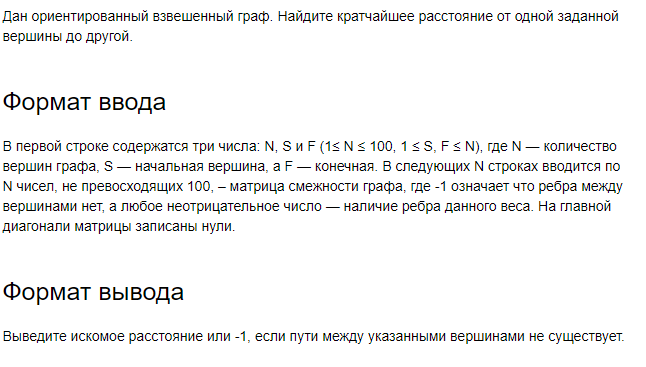

In [48]:
def dijkstra(dist_matrix, n, start, finish):
    visit_flag = [False] * n
    min_len = [-1] * n
    start_v = start
    min_len[start_v] = 0
    flag_func=lambda x, y: x < y
    
    for i in range(n):
        visit_flag[start_v] = True
        start_len = min_len[start_v]
        for finish_v in range(n):
            if finish_v == start_v:
                continue               
            if dist_matrix[start_v][finish_v] != -1:
                now_len = dist_matrix[start_v][finish_v] + start_len
                if (min_len[finish_v] == -1) or flag_func(now_len, min_len[finish_v]):
                    min_len[finish_v] = now_len
  
        flag_first = True
        min_new_v = -1
        for new_v in range(n):
            if not visit_flag[new_v] and min_len[new_v] != -1:
                if flag_first or  flag_func(min_len[new_v], min_len_new_v):
                    min_len_new_v = min_len[new_v]
                    min_new_v = new_v
                    flag_first = False
        if min_new_v == -1:
            return min_len[finish]
        start_v = min_new_v
    return min_len[finish]

# n, s, f = map(int, input().split())
# dist_matrix = [list(map(int, input().split())) for i in range(n)]

# n, s, f = 3, 2, 1
# dist_matrix = [[0, 1, 1], [4, 0, 1], [2, 1, 0]]
# dist_matrix = [[-1] * (n + 1)for i in range(n + 1)]
# n, s, f = 6, 1, 5
# dist_matrix = [[0, 5, -1, -1, -1, -1],
#                [-1, 0, 1, 2, 5, -1], 
#                [-1, -1, 0, -1, 2, -1], 
#                [-1, -1, -1, 0, 1, 4], 
#                [-1, -1, -1, -1, 0, -1],
#                [1, -1, -1, -1, -1, 0]]

print(dijkstra(dist_matrix, n, s - 1, f - 1 ))


8


## Для большей гибкости добавлена возможность изменить функцию выбора лучшего ребра на шаге, функция выбора следующего ребра для шага, а также возможность менять метку отсутствия ребра, в зависимости от набора входных данных. Не рассматривается возможность прохода по ребру-петле. 

In [47]:
def dijkstra(dist_matrix, n, start, finish, flag_func=lambda x, y: x < y, flag_not_edge=-1, func_choice=lambda x, y: x < y):
    visit_flag = [False] * n
    min_len = [flag_not_edge] * n
    start_v = start
    min_len[start_v] = 0
    
    for i in range(n):
        visit_flag[start_v] = True
        start_len = min_len[start_v]
        for finish_v in range(n):
            if finish_v == start_v:
                continue
            
            
            if dist_matrix[start_v][finish_v] != flag_not_edge:
                now_len = dist_matrix[start_v][finish_v] + start_len
                if (min_len[finish_v] == flag_not_edge) or flag_func(now_len, min_len[finish_v]):
                    min_len[finish_v] = now_len
        
        flag_first = True
        min_new_v = -1
        for new_v in range(n):
            if not visit_flag[new_v] and (min_len[new_v] != flag_not_edge):
                if flag_first or func_choice(min_len[new_v], min_len_new_v):
                    min_len_new_v = min_len[new_v]
                    min_new_v = new_v
                    flag_first = False
        if min_new_v == -1:
            return min_len[finish]
        start_v = min_new_v
        
    return min_len[finish]

# n, s, f = map(int, input().split())
# dist_matrix = [list(map(int, input().split())) for i in range(n)]

# n, s, f = 3, 2, 1
# dist_matrix = [[0, 1, 1], [4, 0, 1], [2, 1, 0]]
# dist_matrix = [[-1] * (n + 1)for i in range(n + 1)]
n, s, f = 6, 1, 5
dist_matrix = [[0, 5, -1, -1, -1, -1],
               [-1, 0, 1, 2, 5, -1], 
               [-1, -1, 0, -1, 2, -1], 
               [-1, -1, -1, 0, 1, 4], 
               [-1, -1, -1, -1, 0, -1],
               [1, -1, -1, -1, -1, 0]]
# print(dist_matrix[0][1])
# dist_matrix
print(dijkstra(dist_matrix, n, s - 1, f - 1 ))


8


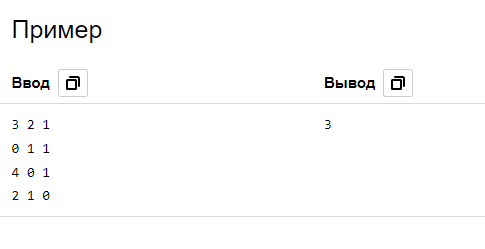

# B. Дейкстра с восстановлением пути
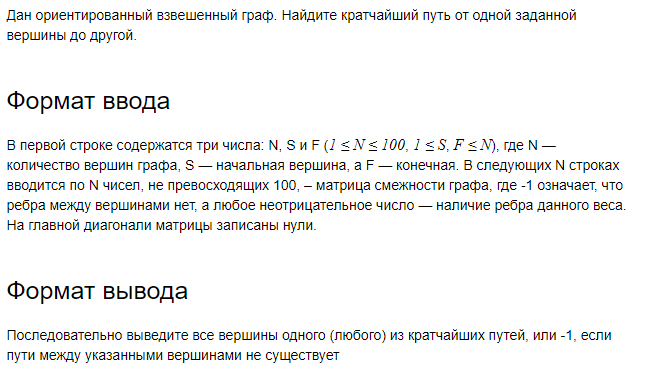

## На основе предыдущего задания.

In [80]:
def dijkstra_with_path(dist_matrix, n, start, finish, flag_func=lambda x, y: x < y,\
                       flag_not_edge=-1, func_choice=lambda x, y: x < y):
    visit_flag = [False] * n
    min_len = [flag_not_edge] * n
    path = [-1] * n
    start_v = start
    min_len[start_v] = 0
    
    for i in range(1, n):
        visit_flag[start_v] = True
        start_len = min_len[start_v]
        for finish_v in range(n):
            if finish_v == start_v:
                continue
            if dist_matrix[start_v][finish_v] != flag_not_edge:
                now_len = dist_matrix[start_v][finish_v] + start_len
                if (min_len[finish_v] == flag_not_edge) or flag_func(now_len, min_len[finish_v]):
                    min_len[finish_v] = now_len
                    path[finish_v] = start_v
        
        flag_first = True
        min_new_v = -1
        for new_v in range(n):
            if not visit_flag[new_v] and (min_len[new_v] != flag_not_edge):
                if flag_first or func_choice(min_len[new_v], min_len_new_v):
                    min_len_new_v = min_len[new_v]
                    min_new_v = new_v
                    flag_first = False
        if min_new_v == -1:
            break
        start_v = min_new_v  
    
    start, finish
    
    start_to_finish = []
    pred = finish
    while pred > -1:
        # есть смещение в названиях, начинается с 0, поэтому +1
        start_to_finish.append(pred + 1)
        pred = path[pred]
        
    return min_len[finish], start_to_finish[::-1]

n, s, f = map(int, input().split())
dist_matrix = [list(map(int, input().split())) for i in range(n)]

# n, s, f = 3, 2, 1
# dist_matrix = [[0, 1, 1], [4, 0, 1], [2, 1, 0]]

# n, s, f = 6, 1, 5
# dist_matrix = [[0, 5, -1, -1, -1, -1],
#                [-1, 0, 1, 2, 5, -1], 
#                [-1, -1, 0, -1, 2, -1], 
#                [-1, -1, -1, 0, 1, 4], 
#                [-1, -1, -1, -1, 0, -1],
#                [1, -1, -1, -1, -1, 0]]

# n, s, f = 6, 1, 5
# dist_matrix = [[-1, -1, -1, -1, -1, -1, -1],
#                [-1, 0, 5, -1, -1, -1, -1],
#                [-1, -1, 0, 1, 2, 5, -1], 
#                [-1, -1, -1, 0, -1, 2, -1], 
#                [-1, -1, -1, -1, 0, 1, 4], 
#                [-1, -1, -1, -1, -1, 0, -1],
#                [-1, 1, -1, -1, -1, -1, 0]]

weight, path = dijkstra_with_path(dist_matrix, n, s - 1, f - 1 )

if weight > -1:
    print(' '.join(map(str, path)))
else:
    print(weight)

3 2 1
0 1 1
4 0 1
2 1 0
2 3 1


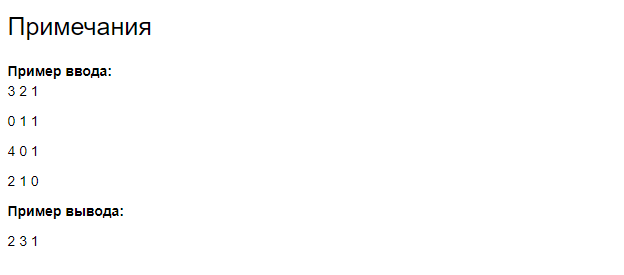

# C. Быстрый алгоритм Дейкстры
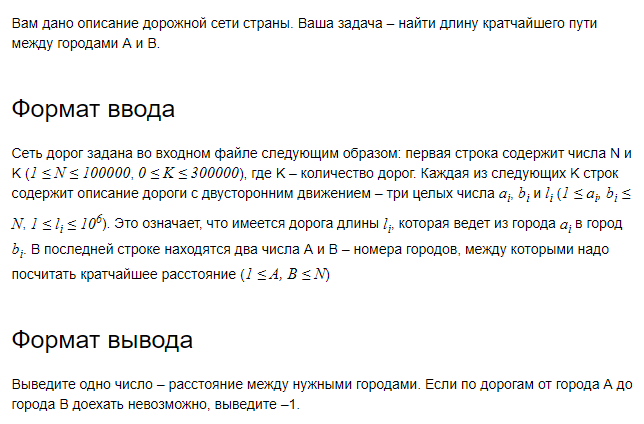

## Превышен лимит исполнения

In [4]:
def dijkstra_fast(neighbor_list, n, start, finish, flag_func=lambda x, y: x < y, flag_not_edge=-1, func_choice=lambda x, y: x < y):
    '''n - количество вершин +1, для сохранения начальных обозначений, 
    таким образом - start и finish без корректировки получаем'''
    visit_flag = [False] * n
    min_len = [flag_not_edge] * n
    start_v = start
    min_len[start_v] = 0
    
    for i in range(n):
        visit_flag[start_v] = True
        start_len = min_len[start_v]
        for (finish_v, weight) in neighbor_list[start_v]:
            now_len = weight + start_len
            if (min_len[finish_v] == flag_not_edge) or flag_func(now_len, min_len[finish_v]):
                min_len[finish_v] = now_len
        flag_first = True
        min_new_v = -1
        for new_v in range(n):
            if not visit_flag[new_v] and (min_len[new_v] != flag_not_edge):
                if flag_first or func_choice(min_len[new_v], min_len_new_v):
                    min_len_new_v = min_len[new_v]
                    min_new_v = new_v
                    flag_first = False
        if min_new_v == -1:
            return min_len[finish]
        start_v = min_new_v
        
    return min_len[finish]

# neighbor_list
# [(lambda a, b, c: (neighbor_list[a].append((b, c)),\
#                                   neighbor_list[b].append((a, c))),\
#                   map(int, input().split())) for i in range(k)]

# n, k = 6, 4
# s = '''\
# 1 2 7
# 2 4 8
# 4 5 1
# 4 3 100'''.split('\n')
# a, b = 3, 1

n, k = 10, 20
s = '''\
9 3 8
6 3 10
3 8 1
2 7 10
1 2 10
7 1 9
5 6 8
6 8 2
5 9 2
2 10 4
1 5 5
8 7 10
10 7 10
8 9 1
2 8 7
4 8 9
7 5 9
1 6 6
3 2 9
4 9 4'''.split('\n')

# neighbor_list = [[] for i in range(n + 1)]
# for i in range(k):
#     a, b, c = map(int, s[i].split())
#     neighbor_list[a].append((b, c))
#     neighbor_list[b].append((a, c))
# a, b = 2, 6



n, k = map(int, input().split())
neighbor_list = [[] for i in range(n + 1)]
for i in range(k):
    a, b, c = map(int, input().split())
    neighbor_list[a].append((b, c))
    neighbor_list[b].append((a, c))
a, b = map(int, input().split())  


print(dijkstra_fast(neighbor_list, n + 1, a, b))


9


# С помощью кучи

In [1]:
import heapq

def dijkstra_fast(neighbor_list, n, start, finish, flag_func=lambda x, y: x < y, flag_not_edge=-1, func_choice=lambda x, y: x < y):
    '''n - количество вершин +1, для сохранения начальных обозначений, 
    таким образом - start и finish без корректировки получаем'''
    visit_flag = [False] * n
    min_len = [flag_not_edge] * n
    start_v = start
    min_len[start_v] = 0
    heap = []
    
    flag_error = False
    for i in range(n):
        visit_flag[start_v] = True
        start_len = min_len[start_v]
        for (weight, finish_v) in neighbor_list[start_v]:
            now_len = weight + start_len
            if (min_len[finish_v] == flag_not_edge) or flag_func(now_len, min_len[finish_v]):
                heapq.heappush(heap, (now_len, finish_v))
                min_len[finish_v] = now_len
        while True:
            try:
                min_len_new_v, start_v = heapq.heappop(heap)
                if not visit_flag[start_v]:# and min_len[start_v] == min_len_new_v 
                    # в куче могут храниться прошлые значение, которые во время работы программы могли улучшится
                    # если значения стали лучше, но из кучи мы вытащили значения хуже, значит мы уже посещали ее,
                    # второе условие является излишним 
                    break
            except IndexError:
#                 print("Поймали исключение, отсутствуют значения в куче")
                flag_error = True

                break
        if flag_error:
            break  
    return min_len[finish]


# n, k = 6, 4
# s = '''\
# 1 2 7
# 2 4 8
# 4 5 1
# 4 3 100'''.split('\n')
# a, b = 3, 1

# n, k = 10, 20
# s = '''\
# 9 3 8
# 6 3 10
# 3 8 1
# 2 7 10
# 1 2 10
# 7 1 9
# 5 6 8
# 6 8 2
# 5 9 2
# 2 10 4
# 1 5 5
# 8 7 10
# 10 7 10
# 8 9 1
# 2 8 7
# 4 8 9
# 7 5 9
# 1 6 6
# 3 2 9
# 4 9 4'''.split('\n')
# a, b = 2, 6

# neighbor_list = [[] for i in range(n + 1)]
# for i in range(k):
#     a_i, b_i, c_i = map(int, s[i].split())
#     neighbor_list[a_i].append((c_i, b_i))
#     neighbor_list[b_i].append((c_i, a_i))


# 


n, k = map(int, input().split())
# n - количество вершин +1, для сохранения начальных обозначений
n += 1
neighbor_list = [[] for i in range(n)]
for i in range(k):
    a_i, b_i, c_i = map(int, input().split())
    neighbor_list[a_i].append((c_i, b_i))
    neighbor_list[b_i].append((c_i, a_i))
a, b = map(int, input().split())  

print(dijkstra_fast(neighbor_list, n, a, b))


6 4
1 2 7
2 4 8
4 5 1
4 3 100
3 1
115


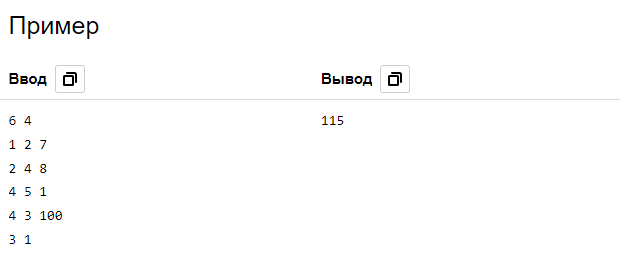

# D. Автобусы в Васюках
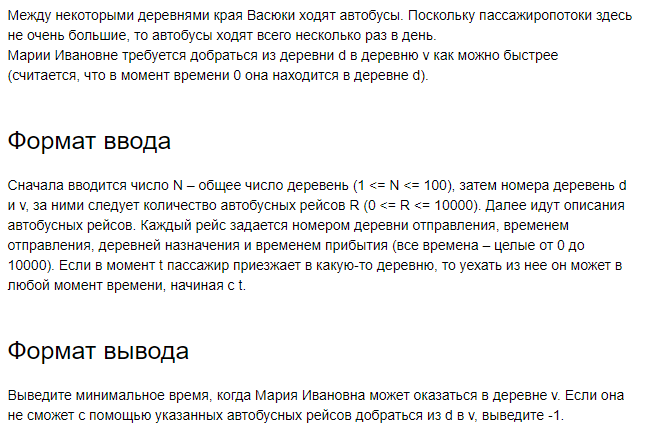

In [2]:
import heapq

def dijkstra_fast_time(neighbor_list, n, start, finish, flag_func=lambda x, y: x < y, flag_not_edge=-1, func_choice=lambda x, y: x < y):
    '''n - количество вершин +1, для сохранения начальных обозначений, 
    таким образом - start и finish без корректировки получаем'''
    visit_flag = [False] * n
    min_len = [flag_not_edge] * n
    start_v = start
    min_len[start_v] = 0
    heap = []
    
    flag_error = False
    for i in range(n):
        visit_flag[start_v] = True
        start_len = min_len[start_v]
        for (t_b, b_i, t_a) in neighbor_list[start_v]:
            now_len = t_b
            if t_a >= start_len and \
                                ((min_len[b_i] == flag_not_edge) or \
                                         flag_func(now_len, min_len[b_i])):
                heapq.heappush(heap, (now_len, b_i))
                min_len[b_i] = now_len
        while True:
            try:
                min_len_new_v, start_v = heapq.heappop(heap)
                if not visit_flag[start_v]:# and min_len[start_v] == min_len_new_v 
                    # в куче могут храниться прошлые значение, которые во время работы программы могли улучшится
                    # если значения стали лучше, но из кучи мы вытащили значения хуже, значит мы уже посещали ее,
                    # второе условие является излишним 
                    break
            except IndexError:
#                 print("Поймали исключение, отсутствуют значения в куче")
                flag_error = True

                break
        if flag_error:
            break  
    return min_len[finish]


# n - количество вершин +1, для сохранения начальных обозначений
n = int(input()) + 1
d, v = map(int, input().split())
r = int(input())

neighbor_list = [[] for i in range(n)]
for i in range(r):
    a_i, t_a, b_i, t_b = map(int, input().split())
    neighbor_list[a_i].append((t_b, b_i, t_a))


print(dijkstra_fast_time(neighbor_list, n, d, v))


3
1 3
4
1 0 2 5
1 1 2 3
2 3 3 5
1 1 3 10
Поймали исключение, отсутствуют значения в куче
5


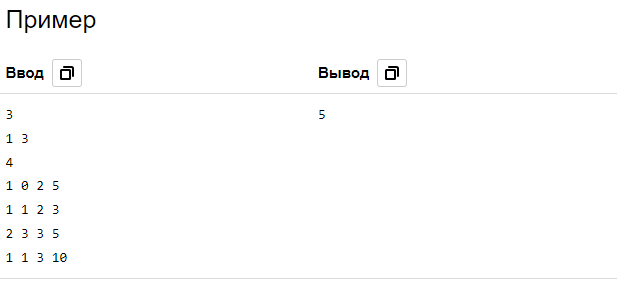

# E. На санях
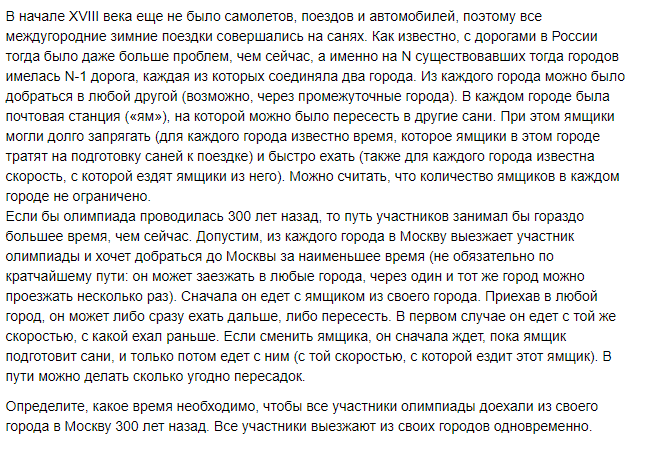

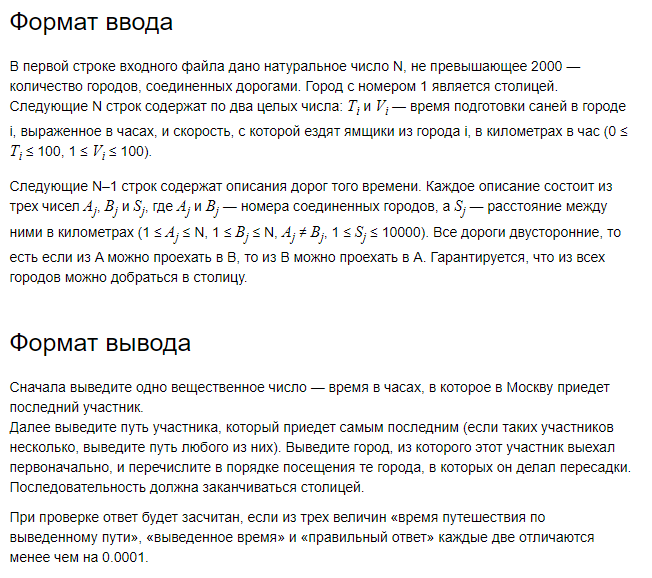

# прошел до 24 TL

In [55]:
def dijkstra_len(neighbor_list, n, start, flag_func=lambda x, y: x < y, flag_not_edge=-1, func_choice=lambda x, y: x < y):
    '''n - количество вершин +1, для сохранения начальных обозначений, 
    таким образом - start и finish без корректировки получаем
    flag_func - выбираем какое расстояние взять, нужно ли перезаписывать в матрицу min_len полученное значение,
            (по умолчанию минимизация len)
    func_choice - какую вершину будем рассматривать на следующем шаге, с каким значением (по умолчанию = min len)'''
    visit_flag = [False] * n
    min_len = [flag_not_edge] * n
    start_v = start
    min_len[start_v] = 0
    
    for i in range(1, n):
        visit_flag[start_v] = True
        start_len = min_len[start_v]
        for (weight, finish_v) in neighbor_list[start_v]:
            now_len = weight + start_len
            if (min_len[finish_v] == flag_not_edge) or flag_func(now_len, min_len[finish_v]):
                min_len[finish_v] = now_len
        flag_first = True
        min_new_v = -1
        for new_v in range(n):
            if not visit_flag[new_v] and (min_len[new_v] != flag_not_edge):
                if flag_first or func_choice(min_len[new_v], min_len_new_v):
                    min_len_new_v = min_len[new_v]
                    min_new_v = new_v
                    flag_first = False
        if min_new_v == -1:
            break
#             return min_len[finish]
        start_v = min_new_v
        
    return min_len


def dijkstra_time(neighbor_list, time_prep_list, speed_list, n, moscow_v=1, flag_func=lambda x, y: x < y,\
                       flag_not_edge=-1, func_choice=lambda x, y: x < y, func_return_answer= lambda x, y: x > y):
    '''n - количество вершин +1(получаем), для сохранения начальных обозначений, 
    таким образом - start без корректировки получаем
    flag_func - выбираем какое расстояние взять, нужно ли перезаписывать в матрицу min_len полученное значение,
            (по умолчанию минимизация len)
    func_choice - какую вершину будем рассматривать на следующем шаге, с каким значением (по умолчанию = min len)'''

    
#     min_len[start_v] = 0
    
    
    time_matrix = [[] for i in range(n) ]
    time_matrix[0] = [-1] * n
    time_matrix[1] = [0] * n
    time_matrix[1][0] = -1
    for i in range(2, n):
#         [ for i in range(1, n)]
        time_matrix[i] = dijkstra_len(neighbor_list, n, i, flag_func=flag_func, func_choice=func_choice) 
        time_matrix[i] = [((len_n / speed_list[i]) + time_prep_list[i]) for len_n in time_matrix[i]]
        time_matrix[i][i] = -1
#     подготовка матрицы связности (ячейка - время от i-строка до j-столбца)

    visit_flag = [False] * n
    min_time = [time_matrix[i][1] for i in range(n)]

    path = [1 for i in range(n)]

    visit_flag[1] = True
    for i in range(2, n):
        pred_v = - 1
        
        
        for i in range(2, n):
            if not(visit_flag[i]) and ((pred_v < 0) or (func_choice(min_time[i], min_time[pred_v]))):
                pred_v = i
        if pred_v < 0:
            break
        visit_flag[pred_v] = True  
        
        for finish in range(2, n):
            if not(visit_flag[finish]):
                with_stop_time = time_matrix[finish][pred_v] + min_time[pred_v]
                if flag_func(with_stop_time, min_time[finish]):
                    min_time[finish] = with_stop_time
                    path[finish] = pred_v
        
    
    ind_max = 1
    
    max_hour = min_time[ind_max]
    
    for i in range(2, n):
        if func_return_answer(min_time[i], max_hour):
            ind_max = i
            max_hour = min_time[ind_max]
    
    path_max = []
    pred = ind_max

    while pred != 1:
        path_max.append(pred)
        pred = path[pred]
    path_max.append(1)

    return max_hour, path_max



n = int(input()) 

time_prep_list = [-1] * (n + 1)
speed_list = [-1] * (n + 1)

for i in range(1, n + 1):
    time_prep_list[i], speed_list[i] = map(int, input().split())

    

neighbor_list = [[] for i in range(n + 1)]
for i in range(n - 1):
    a_i, b_i, s_ab = map(int, input().split())
    neighbor_list[a_i].append((s_ab, b_i))
    neighbor_list[b_i].append((s_ab, a_i))

max_hour, path_max = dijkstra_time(neighbor_list, time_prep_list, speed_list, n + 1)
print(max_hour)
print(*path_max)

# Прошло. Здесь используем кучу

In [73]:
import heapq

def dijkstra_fast(neighbor_list, n, start, flag_func=lambda x, y: x < y, flag_not_edge=-1, func_choice=lambda x, y: x < y):
    '''n - количество вершин +1, для сохранения начальных обозначений, 
    таким образом - start и finish без корректировки получаем'''
    visit_flag = [False] * n
    min_len = [flag_not_edge] * n
    start_v = start
    min_len[start_v] = 0
    heap = []
    
    flag_error = False
    for i in range(n):
        visit_flag[start_v] = True
        start_len = min_len[start_v]
        for (weight, finish_v) in neighbor_list[start_v]:
            now_len = weight + start_len
            if (min_len[finish_v] == flag_not_edge) or flag_func(now_len, min_len[finish_v]):
                heapq.heappush(heap, (now_len, finish_v))
                min_len[finish_v] = now_len
        while True:
            try:
                min_len_new_v, start_v = heapq.heappop(heap)
                if not visit_flag[start_v]:# and min_len[start_v] == min_len_new_v 
                    # в куче могут храниться прошлые значение, которые во время работы программы могли улучшится  
                    break
            except IndexError:
#                 print("Поймали исключение, отсутствуют значения в куче")
                flag_error = True

                break
        if flag_error:
            break  
    return min_len



def dijkstra_time(neighbor_list, time_prep_list, speed_list, n, moscow_v=1, flag_func=lambda x, y: x < y,\
                       flag_not_edge=-1, func_choice=lambda x, y: x < y, func_return_answer= lambda x, y: x > y):
    '''n - количество вершин +1(получаем), для сохранения начальных обозначений, 
    таким образом - start без корректировки получаем
    flag_func - выбираем какое расстояние взять, нужно ли перезаписывать в матрицу min_len полученное значение,
            (по умолчанию минимизация len)
    func_choice - какую вершину будем рассматривать на следующем шаге, с каким значением (по умолчанию = min len)'''

    time_matrix = [[] for i in range(n) ]
    time_matrix[0] = [-1] * n
    time_matrix[1] = [0] * n
    time_matrix[1][0] = -1
    for i in range(2, n):
        time_matrix[i] = [((len_n / speed_list[i]) + time_prep_list[i]) for len_n in
                          dijkstra_fast(neighbor_list, n, i, flag_func=flag_func, func_choice=func_choice) ]

        time_matrix[i][i] = -1
#     подготовка матрицы связности (ячейка - время от i-строка до j-столбца)

    visit_flag = [False] * n
    min_time = [time_matrix[i][1] for i in range(n)]
    path = [1 for i in range(n)]

    visit_flag[1] = True
    
    start_v = 1
    min_time[start_v] = 0
    for i in range(n):
        visit_flag[start_v] = True
        start_time = min_time[start_v]
        for finish_v in range(1, n):
            if finish_v == start_v:
                continue

            if time_matrix[finish_v][start_v] != flag_not_edge:
                now_time = time_matrix[finish_v][start_v] + start_time
                if (min_time[finish_v] == flag_not_edge) or flag_func(now_time, min_time[finish_v]):
                    min_time[finish_v] = now_time
                    path[finish_v] = start_v
        
        flag_first = True
        min_new_v = -1
        for new_v in range(n):
            if not visit_flag[new_v] and (min_time[new_v] != flag_not_edge):
                if flag_first or func_choice(min_time[new_v], min_time_new_v):
                    min_time_new_v = min_time[new_v]
                    min_new_v = new_v
                    flag_first = False
        if min_new_v == -1:
            break
        start_v = min_new_v
        
    ind_max = 1
    max_hour = min_time[ind_max]
    for i in range(2, n):
        if func_return_answer(min_time[i], max_hour):
            ind_max = i
            max_hour = min_time[ind_max]

    path_max = []
    pred = ind_max
    while pred != 1:
        path_max.append(pred)
        pred = path[pred]
    path_max.append(1)

    return max_hour, path_max


n = int(input()) 

time_prep_list = [-1] * (n + 1)
speed_list = [-1] * (n + 1)

for i in range(1, n + 1):
    time_prep_list[i], speed_list[i] = map(int, input().split())

neighbor_list = [[] for i in range(n + 1)]
for i in range(n - 1):
    a_i, b_i, s_ab = map(int, input().split())
    neighbor_list[a_i].append((s_ab, b_i))
    neighbor_list[b_i].append((s_ab, a_i))

max_hour, path_max = dijkstra_time(neighbor_list, time_prep_list, speed_list, n + 1)
print(max_hour)
print(*path_max)

In [75]:
n = 40
t_v = '''\
1 100
1 99
1 98
1 97
1 96
1 95
1 94
1 93
1 92
1 91
1 90
1 89
1 88
1 87
1 86
1 85
1 84
1 83
1 82
1 81
1 80
1 79
1 78
1 77
1 76
1 75
1 74
1 73
1 72
1 71
1 70
1 69
1 68
1 67
1 66
1 65
1 64
1 63
1 62
1 61'''.split('\n')

ne_list = '''\
24 13 6878
29 13 4714
29 1 294
1 37 2123
7 37 2358
7 22 3954
35 22 8173
35 5 6065
5 11 7288
17 11 9885
23 17 6416
10 23 759
25 10 3316
25 40 8075
40 8 2952
8 14 536
38 14 3646
38 28 5937
30 28 4789
21 30 5764
21 19 7663
3 19 5497
32 3 7111
15 32 3085
15 12 5586
6 12 32
6 20 7333
9 20 5067
9 18 6376
18 4 3958
31 4 698
39 31 329
34 39 7189
26 34 433
33 26 1442
16 33 6918
16 27 5008
27 2 3275
36 2 2130'''.split('\n')

time_prep_list = [-1] * (n + 1)
speed_list = [-1] * (n + 1)

for i in range(1, n + 1):
    time_prep_list[i], speed_list[i] = map(int, t_v[i - 1].split())

neighbor_list = [[] for i in range(n + 1)]
for i in ne_list:
    a_i, b_i, s_ab = map(int, i.split())
    neighbor_list[a_i].append((s_ab, b_i))
    neighbor_list[b_i].append((s_ab, a_i))

max_hour, path_max = dijkstra_time(neighbor_list, time_prep_list, speed_list, n + 1)
print(max_hour)
print(*path_max)


1641.1934731934732
36 2 1


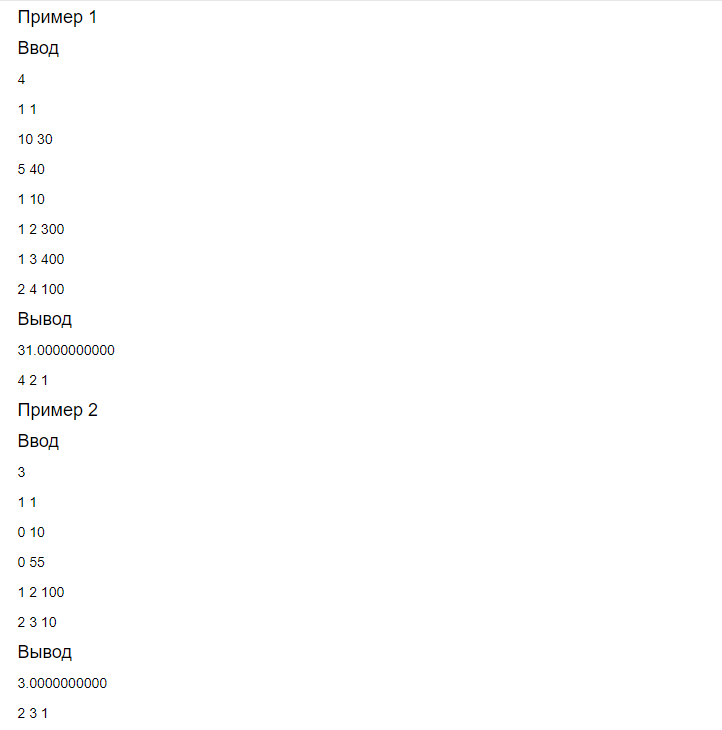

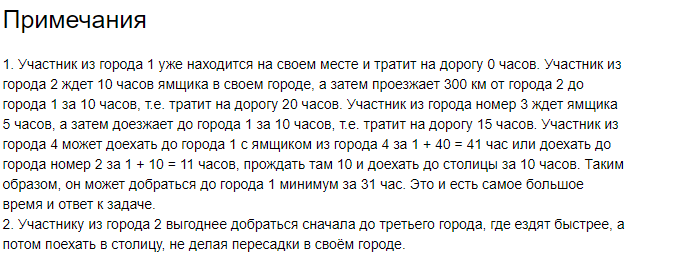